In [1]:
require "pycall/import"
require "numpy"
require "matplotlib/iruby"
require "matplotlib/pyplot"

include PyCall::Import
pyimport "pandas", as: "pd"
np = Numpy
plt = Matplotlib::Pyplot
Matplotlib::IRuby.activate

[:inline, "module://matplotlib_rb.backend_inline"]

In [2]:
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['点数'])
scores[...10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [3]:
np.random.choice([1, 2, 3], 3)

array([3, 3, 1])

In [4]:
np.random.choice([1, 2, 3], 3, replace: false)

array([2, 3, 1])

In [5]:
np.random.seed(0)
np.random.choice([1, 2, 3], 3)

array([1, 2, 1])

In [6]:
np.random.seed(0)
sample = np.random.choice(scores, 20)

sample.mean

70.4

In [7]:
scores.mean

69.53

In [8]:
5.times do |i|
  sample = np.random.choice(scores, 20)
  puts("#{i+1}回目の無作為抽出で得た標本平均 #{sample.mean}")
end

1回目の無作為抽出で得た標本平均 72.45
2回目の無作為抽出で得た標本平均 63.7
3回目の無作為抽出で得た標本平均 66.05
4回目の無作為抽出で得た標本平均 71.7
5回目の無作為抽出で得た標本平均 74.15


5

In [9]:
dice = [1, 2, 3, 4, 5, 6]
prob = [1.0/21, 2.0/21, 3.0/21, 4.0/21, 5.0/21, 6.0/21]

[0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857]

In [10]:
np.random.choice(dice, p: prob)

1

In [11]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p: prob)
sample

array([4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5,
       3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6,
       5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2,
       2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2,
       4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4])

In [12]:
freq, = np.histogram(sample, bins: 6, range: [1, 7])
pd.DataFrame.({'度数'=>freq,
              '相対度数'=>freq / num_trial},
              index: pd.Index.(np.arange(1, 7), name: '出目'))

,度数,相対度数
出目,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


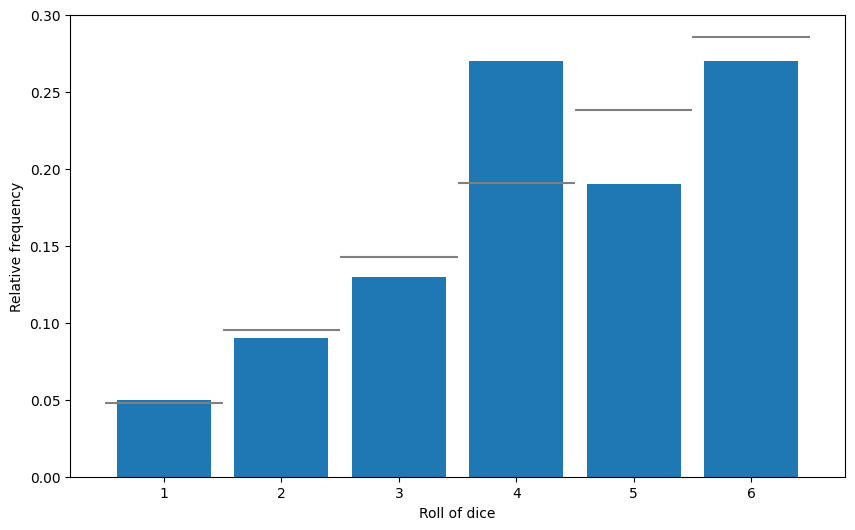

In [13]:
fig = plt.figure(figsize: [10, 6])
ax = fig.add_subplot(111)
ax.hist(sample, bins: 6, range: [1, 7], density: true, rwidth: 0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors: 'gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('Roll of dice')
ax.set_ylabel('Relative frequency')
plt.show

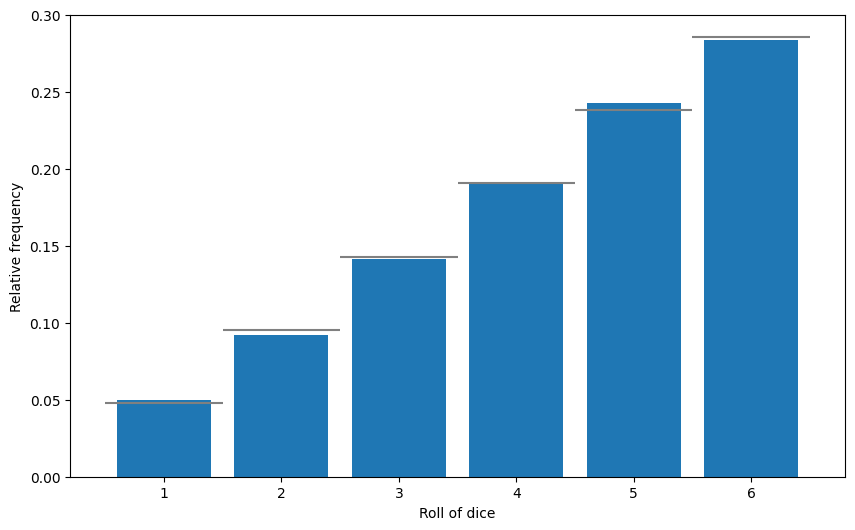

In [14]:
num_trial = 10000
sample = np.random.choice(dice, size: num_trial, p: prob)

fig = plt.figure(figsize: [10, 6])
ax = fig.add_subplot(111)
ax.hist(sample, bins: 6, range: [1, 7], density: true, rwidth: 0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors: 'gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('Roll of dice')
ax.set_ylabel('Relative frequency')
plt.show

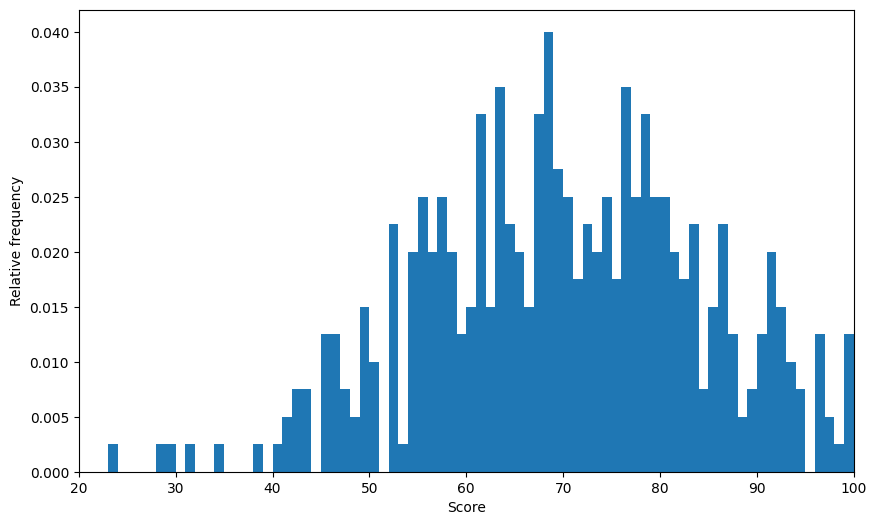

In [15]:
fig = plt.figure(figsize: [10, 6])
ax = fig.add_subplot(111)
ax.hist(scores, bins: 100, range: [0, 100], density: true)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('Score')
ax.set_ylabel('Relative frequency')
plt.show

In [16]:
np.random.choice(scores)

89

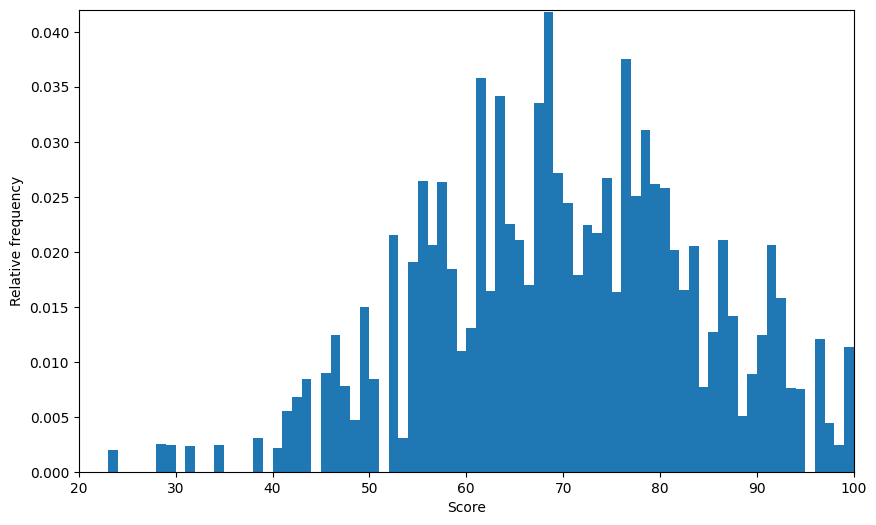

In [17]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize: [10, 6])
ax = fig.add_subplot(111)
ax.hist(sample, bins: 100, range: [0, 100], density: true)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('Score')
ax.set_ylabel('Relative frequency')
plt.show

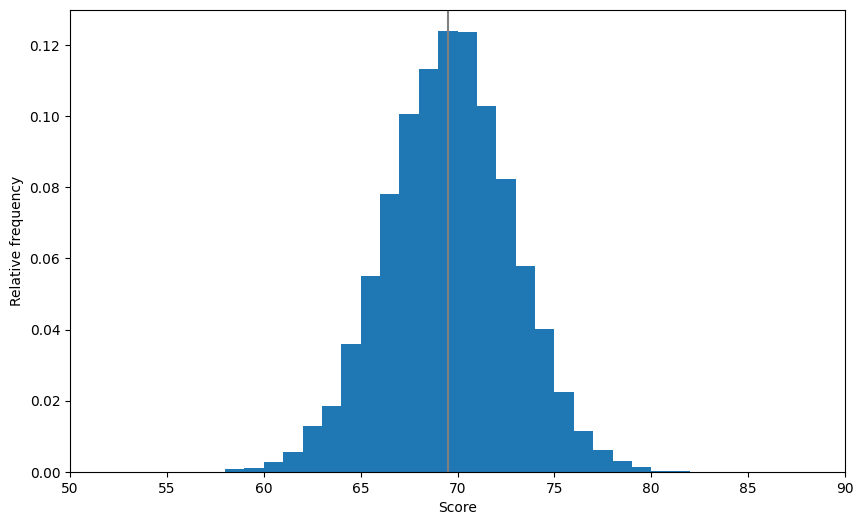

In [18]:
sample_means = 10000.times.map { np.random.choice(scores, 20).mean }

fig = plt.figure(figsize: [10, 6])
ax = fig.add_subplot(111)
ax.hist(sample_means, bins: 100, range:[0, 100], density: true)
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('Score')
ax.set_ylabel('Relative frequency')
plt.show